### FAULTY AIR QUALITY SENSOR CHALLENGE

#### VYRODOK TEAM
School: EDSA

- Eric Mbuthia
- Linda Kelida
- Teddy Waweru
- Jessica Njuguna

# 1. EDA Process

#### Import EDA Packages

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()


from sklearn.preprocessing import StandardScaler, LabelEncoder
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler

#Scaling data
from sklearn.preprocessing import StandardScaler




#### Import Data

In [2]:
#A00
# Load Files
raw_train_df = pd.read_csv('Challenge/data/train.csv', parse_dates=['Datetime'])
raw_test_df = pd.read_csv('Challenge/data/test.csv', parse_dates=['Datetime'])
raw_samp_df = pd.read_csv('Challenge/data/SampleSubmission.csv')

In [70]:
raw_train_df.describe()

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
count,293563.000000,293563.000000,293628.000000,293628.000000,297177.000000
mean,40.751195,38.183018,23.316554,78.653623,0.371072
std,28.526182,28.647761,3.836971,14.772725,0.483092
min,-9.450000,-9.700000,16.700000,27.000000,0.000000
25%,22.430000,19.520000,20.400000,68.000000,0.000000
50%,36.470000,33.720000,21.900000,84.000000,0.000000
75%,49.420000,47.570000,26.300000,91.000000,1.000000
max,997.960000,997.260000,34.900000,99.000000,1.000000


## Statistical Summaries

In [155]:
raw_train_df.columns, raw_test_df.columns, samp_df.columns

(Index(['ID', 'Datetime', 'Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature',
        'Relative_Humidity', 'Offset_fault'],
       dtype='object'),
 Index(['ID', 'DATETIME', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'HOUR',
        'HOUR_OF_WEEK', 'SENSOR1_PM2.5', 'SENSOR2_PM2.5', 'TEMPERATURE',
        'RELATIVE_HUMIDITY', 'OFFSET_FAULT'],
       dtype='object'),
 Index(['ID', 'Offset_fault'], dtype='object'))

In [167]:
raw_train_df.shape, raw_test_df.shape, raw_samp_df.shape

((297177, 7), (127361, 6), (127361, 2))

In [157]:
raw_train_df.info(), raw_train_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297177 entries, 0 to 297176
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ID                 297177 non-null  object        
 1   Datetime           297177 non-null  datetime64[ns]
 2   Sensor1_PM2.5      293563 non-null  float64       
 3   Sensor2_PM2.5      293563 non-null  float64       
 4   Temperature        293628 non-null  float64       
 5   Relative_Humidity  293628 non-null  float64       
 6   Offset_fault       297177 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 15.9+ MB


(None,
 ID                           object
 Datetime             datetime64[ns]
 Sensor1_PM2.5               float64
 Sensor2_PM2.5               float64
 Temperature                 float64
 Relative_Humidity           float64
 Offset_fault                  int64
 dtype: object)

We convert the Datetime column to datetime format, & add columns for the year, month, day & hour <br/>
We shall have this in a function so it can be reused later.

We shall declare a function that will contain these initial changes, in case we need to repeat the preparation of the dataset to contain these columns.
(May be updated with other functions)

In [3]:
#Input: Expects df similar to the original dataset
#Output: DF with the following columns:

def prepare_df(_df):

    df = _df.copy(deep=True)


    # Add columns for year, month, day, hour
    df['YEAR'] = pd.DatetimeIndex(df['Datetime']).year
    df['MONTH'] = pd.DatetimeIndex(df['Datetime']).month
    df['DAY'] = pd.DatetimeIndex(df['Datetime']).day
    df['HOUR'] = pd.DatetimeIndex(df['Datetime']).hour
    df['DAY_OF_WEEK'] = pd.DatetimeIndex(df['Datetime']).dayofweek
    df['HOUR_OF_WEEK'] = ((pd.DatetimeIndex(df['Datetime']).dayofweek * 24) + pd.DatetimeIndex(df['Datetime']).hour)


    #Create the average of Sensor Data
    # train_df['SENSOR_AVG'] = train_df[['SENSOR1_PM2.5','SENSOR2_PM2.5']].mean(axis = 1)
    # df = pd.get_dummies(df, columns = ['DAY'])

    #Standardize column titles
    df.rename(
        columns = {
            'Datetime': 'DATETIME', 'Sensor1_PM2.5' : 'SENSOR1_PM2.5',
            'Sensor2_PM2.5' : 'SENSOR2_PM2.5', 'Temperature': 'TEMPERATURE',
            'Relative_Humidity': 'RELATIVE_HUMIDITY', 'Offset_fault': 'OFFSET_FAULT'
        }, inplace=True
    )

    #Re-order columns
    df = df.reindex(
        columns =  ['YEAR'] + ['MONTH'] + ['DAY'] + \
            ['DAY_OF_WEEK'] + ['HOUR'] + ['HOUR_OF_WEEK'] + \
            [col for col in df.columns if col not in \
                ['ID', 'DATETIME', 'YEAR', 'MONTH', 'DAY', 'HOUR',
                'OFFSET_FAULT', 'DAY_OF_WEEK', 'HOUR_OF_WEEK']]\
                    + ['OFFSET_FAULT']
    )
    # df = df.reindex(
    #     columns = ['ID'] + ['DATETIME'] + ['YEAR'] + ['MONTH'] + ['DAY'] + \
    #         ['DAY_OF_WEEK'] + ['HOUR'] + ['HOUR_OF_WEEK'] + \
    #         [col for col in df.columns if col not in \
    #             ['ID', 'DATETIME', 'YEAR', 'MONTH', 'DAY', 'HOUR',
    #             'OFFSET_FAULT', 'DAY_OF_WEEK', 'HOUR_OF_WEEK']]\
    #                 + ['OFFSET_FAULT']
    # )

    return df

In [4]:
train_df = prepare_df(raw_train_df)
test_df = prepare_df(raw_test_df)

In [162]:
train_df.describe().round(2)

,YEAR,MONTH,DAY,DAY_OF_WEEK,HOUR,HOUR_OF_WEEK,SENSOR1_PM2.5,SENSOR2_PM2.5,TEMPERATURE,RELATIVE_HUMIDITY,OFFSET_FAULT
count,297177.00,297177.00,297177.00,297177.00,297177.00,297177.00,293563.00,293563.00,293628.00,293628.00,297177.00
mean,2021.21,9.07,15.99,2.99,11.39,83.14,40.75,38.18,23.32,78.65,0.37
std,0.41,4.19,8.67,2.00,6.94,48.55,28.53,28.65,3.84,14.77,0.48
min,2021.00,1.00,1.00,0.00,0.00,0.00,-9.45,-9.70,16.70,27.00,0.00
25%,2021.00,10.00,9.00,1.00,5.00,41.00,22.43,19.52,20.40,68.00,0.00
50%,2021.00,11.00,16.00,3.00,11.00,83.00,36.47,33.72,21.90,84.00,0.00
75%,2021.00,12.00,23.00,5.00,17.00,125.00,49.42,47.57,26.30,91.00,1.00
max,2022.00,12.00,31.00,6.00,23.00,167.00,997.96,997.26,34.90,99.00,1.00


### Dealing with Null Values

In [6]:
train_df.isna().sum(), test_df.isna().sum()

(YEAR                    0
 MONTH                   0
 DAY                     0
 DAY_OF_WEEK             0
 HOUR                    0
 HOUR_OF_WEEK            0
 SENSOR1_PM2.5        3614
 SENSOR2_PM2.5        3614
 TEMPERATURE          3549
 RELATIVE_HUMIDITY    3549
 OFFSET_FAULT            0
 dtype: int64,
 YEAR                      0
 MONTH                     0
 DAY                       0
 DAY_OF_WEEK               0
 HOUR                      0
 HOUR_OF_WEEK              0
 SENSOR1_PM2.5             0
 SENSOR2_PM2.5             0
 TEMPERATURE           88090
 RELATIVE_HUMIDITY     88090
 OFFSET_FAULT         127361
 dtype: int64)

Option 1: Drop rows with Null values

In [7]:
def drop_na(_df):
    df = _df.copy(deep=True)
    
    df= df.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False)

    return df

Option 2: Replace with Mean values

In [8]:
def fill_na_mean(_df, type = 'train'):
    df = _df.copy(deep=True)
    if type == 'train':
        # df['SENSOR1_PM2.5'] = df['SENSOR1_PM2.5'].fillna(df['SENSOR1_PM2.5'].mean())
        # df['SENSOR2_PM2.5'] = df['SENSOR2_PM2.5'].fillna(df['SENSOR2_PM2.5'].mean())
        df['TEMPERATURE'] = df['TEMPERATURE'].fillna(df['TEMPERATURE'].mean())
        df['RELATIVE_HUMIDITY'] = df['RELATIVE_HUMIDITY'].fillna(df['RELATIVE_HUMIDITY'].mean())
    else:
        df['TEMPERATURE'] = df['TEMPERATURE'].fillna(df['TEMPERATURE'].mean())
        df['RELATIVE_HUMIDITY'] = df['RELATIVE_HUMIDITY'].fillna(df['RELATIVE_HUMIDITY'].mean())

    return df



Option 3: For Relative_Humidity & Temperature, replace with cross values if they're available. <br>
ie. if row has Relative_humidity but Temperature is blank, determine the relative ratio between them & use this for the calculation.

In [9]:
train_df[['RELATIVE_HUMIDITY', 'TEMPERATURE']].describe()

,RELATIVE_HUMIDITY,TEMPERATURE
count,293628.000000,293628.000000
mean,78.653623,23.316554
std,14.772725,3.836971
min,27.000000,16.700000
25%,68.000000,20.400000
50%,84.000000,21.900000
75%,91.000000,26.300000
max,99.000000,34.900000


By using ratios, we can consider the ranges of the values, for a closer relatable value to use to replace, which would be more accurate than using the mean.

Option 4: Replace with zeroes

In [10]:
def fill_na_na(_df):
    df = _df.copy(deep=True)

    df = df.fillna(0)

    return df

The final implementation was:
- Training dataset <br>
Drop the SENSOR1, SENSOR2 columns with Nan values in the training dataset, since the number of columns were ~1% of the entire dataset.
- Test dataset<br>
Exclude the TEMPERATURE & RELATIVE_HUMIDITY features from the training set, given that the test data had >50% missing values in these features.


## Visualizations

### Target Variable Distribution

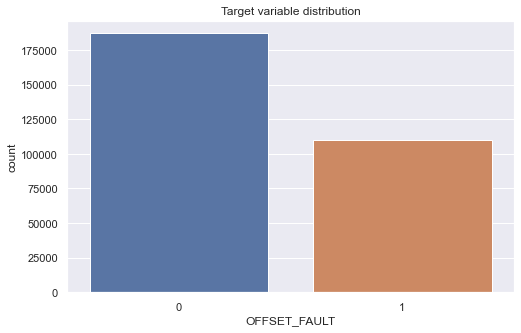

In [216]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(x = train_df["OFFSET_FAULT"])
plt.title('Target variable distribution')
plt.show()

### Outliers

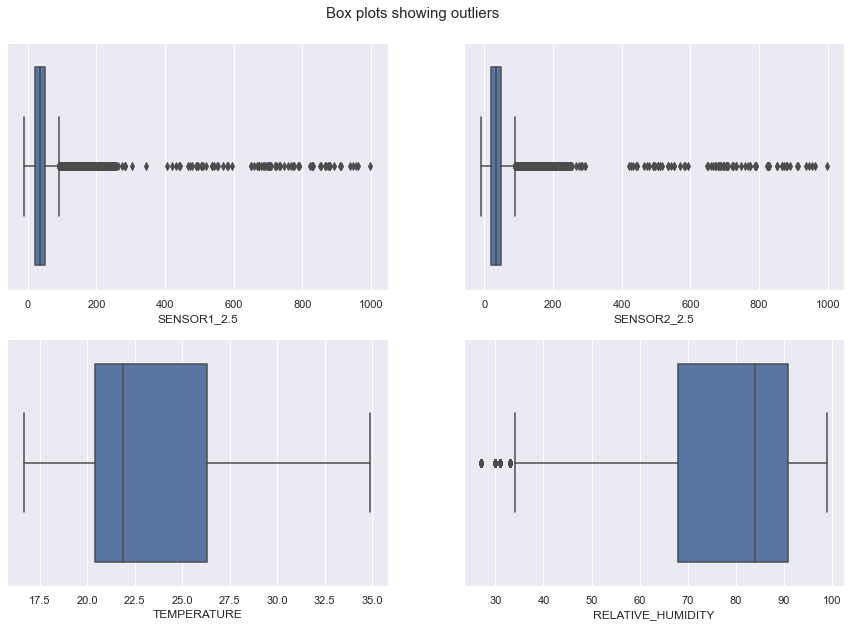

In [217]:
# Plotting boxplots for each of the numerical columns
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), train_df, ['SENSOR1_2.5',	'SENSOR2_2.5',	'TEMPERATURE',	'RELATIVE_HUMIDITY']):
  sns.boxplot(x = train_df[name], ax = ax)

In [173]:
train_df.kurtosis()

C:\Users\teddy\AppData\Local\Temp/ipykernel_26236/861045134.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df.kurtosis()


YEAR                  0.073008
MONTH                -0.046183
DAY                  -1.118707
DAY_OF_WEEK          -1.248912
HOUR                 -1.212467
HOUR_OF_WEEK         -1.195986
SENSOR1_PM2.5        97.920918
SENSOR2_PM2.5        97.960266
TEMPERATURE          -0.632673
RELATIVE_HUMIDITY    -0.252337
OFFSET_FAULT         -1.715106
dtype: float64

### Feature Correlation

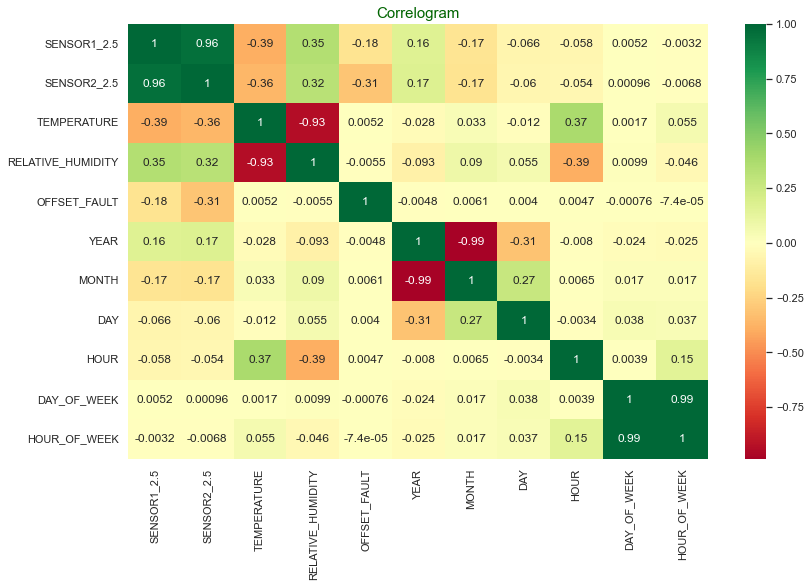

In [220]:
#Quantify correlations
corr = train_df.corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

# 2. Feature Engineering

Binarizing Columns <br>
The function below intends to place numerical features into bins

In [5]:
def bin_df(df_):

    df = df_.copy(deep=True)
    le = LabelEncoder()

    df['TEMPERATURE_bin'] = pd.qcut(df.TEMPERATURE, q=[0, .25, .50, .75, 1])
    df['RELATIVE_HUMIDITY_bin'] = pd.qcut(df.RELATIVE_HUMIDITY, q=[0, .25, .50, .75, 1])
    df['SENSOR1_PM2.5_bin'] = pd.qcut(df['SENSOR1_PM2.5'], q=[0, .25, .50, .75, 1])
    df['SENSOR2_PM2.5_bin'] = pd.qcut(df['SENSOR2_PM2.5'], q=[0, .25, .50, .75, 1])
    df['SENSOR_AVG_bin'] = pd.qcut(df['SENSOR_AVG'], q=[0, .25, .50, .75, 1])

    df.drop(columns=['TEMPERATURE', 'RELATIVE_HUMIDITY', 'SENSOR1_PM2.5', 'SENSOR2_PM2.5', 'SENSOR_AVG'], inplace=True)
    #apply labelencoder

    df['TEMPERATURE'] = le.fit_transform(df['TEMPERATURE_bin'])
    df['RELATIVE_HUMIDITY'] = le.fit_transform(df['RELATIVE_HUMIDITY_bin'])
    df['SENSOR1_PM2.5'] = le.fit_transform(df['SENSOR1_PM2.5_bin'])
    df['SENSOR2_PM2.5'] = le.fit_transform(df['SENSOR2_PM2.5_bin'])
    df['SENSOR_AVG'] = le.fit_transform(df['SENSOR_AVG_bin'])

    df.drop(columns=['TEMPERATURE_bin', 'RELATIVE_HUMIDITY_bin', 'SENSOR1_PM2.5_bin', 'SENSOR2_PM2.5_bin', 'SENSOR_AVG_bin'], inplace=True)

    return df


drop the datetime and id columns

### Scaling of Data

In [12]:
def scale_df(_df):

    df = _df[
        [col for col in _df.columns if col not in ['OFFSET_FAULT', 'ID', 'DATETIME']
    ]].copy(deep=True)
    scaler = StandardScaler()
    # fit and transform in one step
    standardized = scaler.fit_transform(df)
    # convert the scaled predictor values into a dataframe
    df = pd.DataFrame(standardized,columns=df.columns)
    df.head()

    return df

# 3. Modelling

### Model Preparation

#### Import Packages

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier
from sklearn.naive_bayes import GaussianNB

import xgboost as xgb

#Packages for measuring model's accuracy
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

### Preprocessing Test Data

In [14]:
test_df = prepare_df(raw_test_df)

### DecisionTree Classifier

In [15]:
#Function to take df with valid columns to be used for model fitting.
# Output is the DecisionTreeClassifier
#Additional parameters for the Classifier can be passed
def dtc_model(_df,
                max_depth = 6,
                criterion = 'entropy',
                random_state = 0):


    df = _df.copy(deep=True)

    X = df[[col for col in df.columns if col not in \
        ['OFFSET_FAULT', 'ID', 'DATETIME']
        ]]
    y = df['OFFSET_FAULT']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)
    # Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
    dtc = DecisionTreeClassifier(max_depth=max_depth,
                                    criterion = criterion,
                                    random_state=random_state)

    # Fit dt to the training set
    dtc.fit(X_train, y_train)

    # Predict test set labels
    y_pred = dtc.predict(X_test)

    # Compute test set accuracy  
    print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
    print('\n')
    print(f'{classification_report(y_test, y_pred)}')

    #Plot the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=dtc.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)

    fig, axs = plt.subplots(1,2, figsize = (15,10))

    disp.plot(ax=axs[1])

    # Plot Feature Importance Bar Chart
    impo_df = pd.DataFrame({'feature': X.columns, 'importance': dtc.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
    impo_df = impo_df.sort_values(by = 'importance', ascending = True)
    impo_df.plot(kind = 'barh', color = 'purple', ax = axs[0])

    plt.show()

    return dtc

Example of Calling the above function:

Accuracy score: 0.7614913520425332


              precision    recall  f1-score   support

           0       0.86      0.74      0.79     55966
           1       0.64      0.80      0.71     33188

    accuracy                           0.76     89154
   macro avg       0.75      0.77      0.75     89154
weighted avg       0.78      0.76      0.77     89154



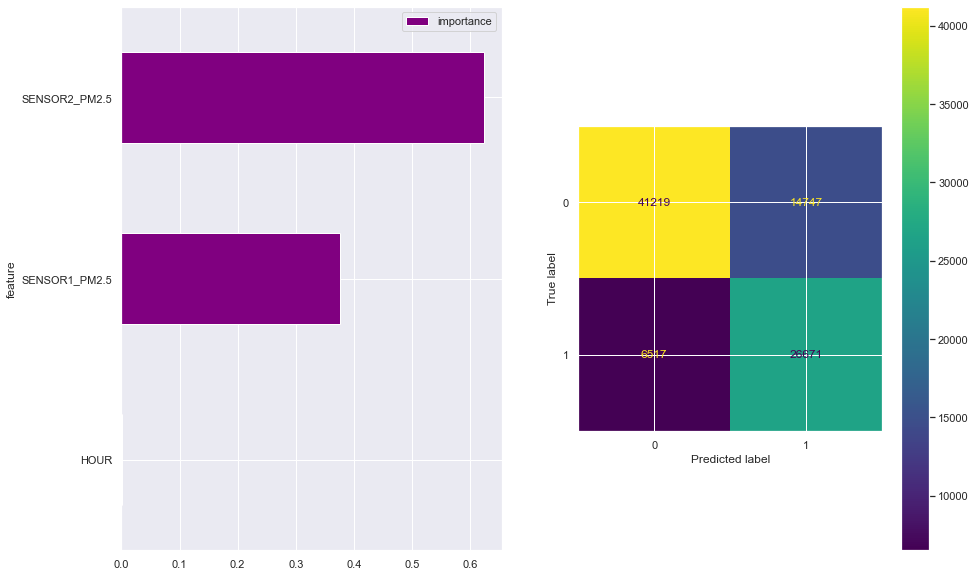

In [18]:
#Create columns as per the preparation function
train_df = prepare_df(raw_train_df)

#Fill the Nan values with zeroes
train_df = fill_na_na(train_df)

#At this point, we can select specific columns to be used in the fitting.
#We can experiment by using the SENSOR1_PM2.5, SENSOR2_PM2.5, TEMPERATURE & HOUR columns
# NOTE that the OFFSET_FAULT column should always be included
model_cols = ['SENSOR1_PM2.5', 'SENSOR2_PM2.5', 'HOUR', 'OFFSET_FAULT']

#If we want to use all columns, uncomment the line below
# model_cols = [col for col in train_df.columns]

# The following columns are removed in the function itself: ID, DATETIME

#Fit the model
dtc_ = dtc_model(train_df[model_cols])

### Random Forest Classifier

In [19]:
#Function to take df with valid columns to be used for model fitting.
# OUtput is the RandomForestClassifier
#Function can take additional paramters for the RandomForestClassifier Model.
def rfc_model(_df,
                max_depth=8,
                n_estimators=8,
                random_state=0):

    df = _df.copy(deep=True)

    # Splitting the dataset into X & y
    X = df[[col for col in df.columns if col not in\
        ['OFFSET_FAULT', 'ID', 'DATETIME']
        ]]
    y = df['OFFSET_FAULT']

    #Splitting the data into training & testing sets.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                            random_state= 42)

    # Instantiate the RandomForestClassifier & fit the train data
    rfc = RandomForestClassifier(max_depth= max_depth,
                                n_estimators = n_estimators,
                                random_state= random_state)
    #Fit the train data
    rfc.fit(X_train, y_train)

    #Test the model
    y_pred = rfc.predict(X_test)

    #Calculate the model's accuracy
    print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
    print('\n')
    print(f'{classification_report(y_test, y_pred)}')

    #Plot the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=rfc.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)

    fig, axs = plt.subplots(1,2, figsize = (15,10))

    disp.plot(ax=axs[1])

    # Plot Feature Importance Bar Chart
    impo_df = pd.DataFrame({'feature': X.columns, 'importance': rfc.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
    impo_df = impo_df.sort_values(by = 'importance', ascending = True)
    impo_df.plot(kind = 'barh', color = 'purple', ax = axs[0])

    # plt.show()

    # Return the fitted model & the X-variable features DF
    return rfc, X



Example of calling the above function:

Accuracy score: 0.8589407093344101


              precision    recall  f1-score   support

           0       0.87      0.91      0.89     37442
           1       0.84      0.77      0.80     21994

    accuracy                           0.86     59436
   macro avg       0.85      0.84      0.85     59436
weighted avg       0.86      0.86      0.86     59436



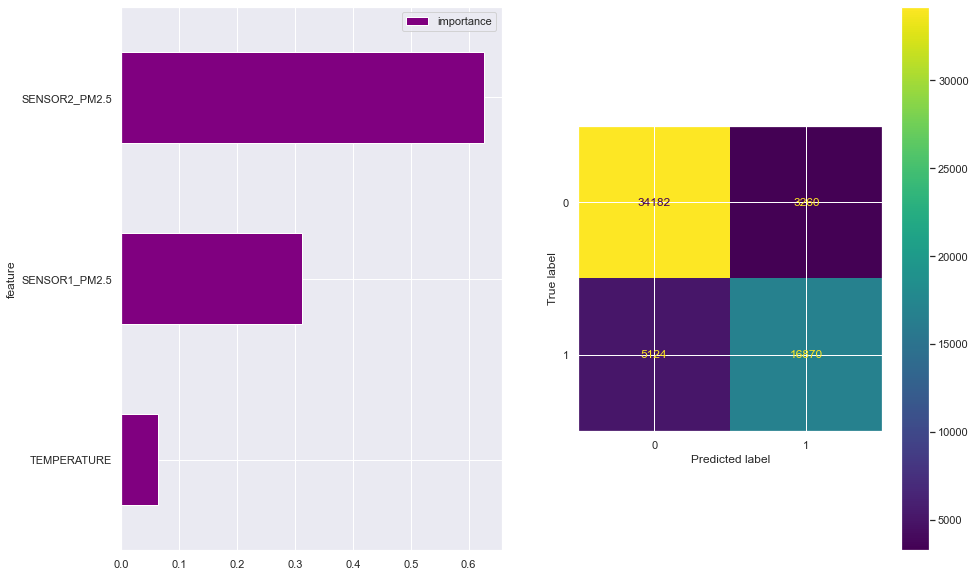

In [20]:
#Create columns as per the preparation function
train_df = prepare_df(raw_train_df)

#Fill the Nan values  in temp & humidity using mean values
# train_df = fill_na_mean(train_df)
#Fill Nan values with zeroes
train_df = fill_na_na(train_df)

#Bin the continuous features
# train_df = bin_df(train_df)

#At this point, we can select specific columns to be used in the fitting.
#We can experiment by using the SENSOR1_PM2.5, SENSOR2_PM2.5, TEMPERATURE & HOUR columns
# NOTE that the OFFSET_FAULT column should always be included
model_cols = ['SENSOR1_PM2.5', 'SENSOR2_PM2.5', 'TEMPERATURE', 'OFFSET_FAULT']

#If we want to use all columns, uncomment the line below
# model_cols = [col for col in train_df.columns]

# The following columns are removed in the function itself: ID, DATETIME

#Fit the model. Return fitted model & the X-variable features DF.
rfc, X_rfc = rfc_model(train_df[model_cols])

We introduce below a function `pred_test` that carries out the prediction of the test data.<br>
The function takes the fitted model & the X-variable features DF that were used in the fitting.

C:\Users\teddy\miniconda3\envs\DS_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


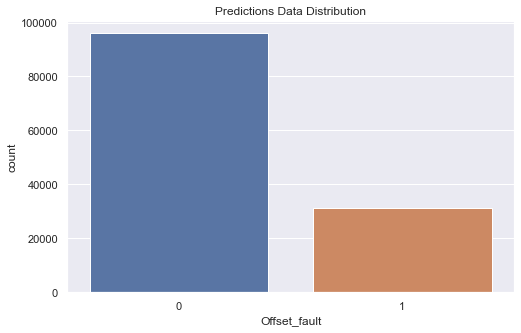

In [176]:
pred_test(rfc_, X_rfc)

#### XG Boost Classifier

In [198]:
#Function to take df with valid columns to be used for model fitting.
# OUtput is the RandomForestClassifier
#Function can take additional paramters for the RandomForestClassifier Model.
def xgb_model(_df,
                learning_rate= 0.1,
                max_depth = 10,
                min_child_weight = 1,
                n_estimators=100,
                objective= 'binary:logistic',
                random_state=0,
                eval_metric = 'logloss'):

    df = _df.copy(deep=True)

    # Splitting the dataset into X & y
    X = df[[col for col in df.columns if col not in\
        ['OFFSET_FAULT', 'ID', 'DATETIME']
        ]]
    y = df['OFFSET_FAULT']

    #Splitting the data into training & testing sets.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                            random_state= 42)

    # Instantiate the RandomForestClassifier & fit the train data
    # xgb = XGBClassifier(learning_rate= learning_rate,
    #                     max_depth = max_depth,
    #                     n_estimators = n_estimators,
    #                     min_child_weight = min_child_weight,
    #                     objective = objective,
    #                     eval_metric = eval_metric,
    #                     random_state= random_state)
    xgb = XGBClassifier()
    #Fit the train data
    xgb.fit(X_train, y_train)

    #Test the model
    y_pred = xgb.predict(X_test)

    #Calculate the model's accuracy
    print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
    print('\n')
    print(f'{classification_report(y_test, y_pred)}')

    #Plot the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=xgb.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)

    fig, axs = plt.subplots(1,2, figsize = (15,10))

    disp.plot(ax=axs[1])

    # Plot Feature Importance Bar Chart
    impo_df = pd.DataFrame({'feature': X.columns, 'importance': xgb.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
    impo_df = impo_df.sort_values(by = 'importance', ascending = True)
    impo_df.plot(kind = 'barh', color = 'purple', ax = axs[0])

    # plt.show()

    # Return the fitted model & the X-variable features DF
    return xgb, X

C:\Users\teddy\miniconda3\envs\DS_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:42:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score: 0.9509478309744009


              precision    recall  f1-score   support

           0       0.96      0.96      0.96     36998
           1       0.93      0.93      0.93     21715

    accuracy                           0.95     58713
   macro avg       0.95      0.95      0.95     58713
weighted avg       0.95      0.95      0.95     58713



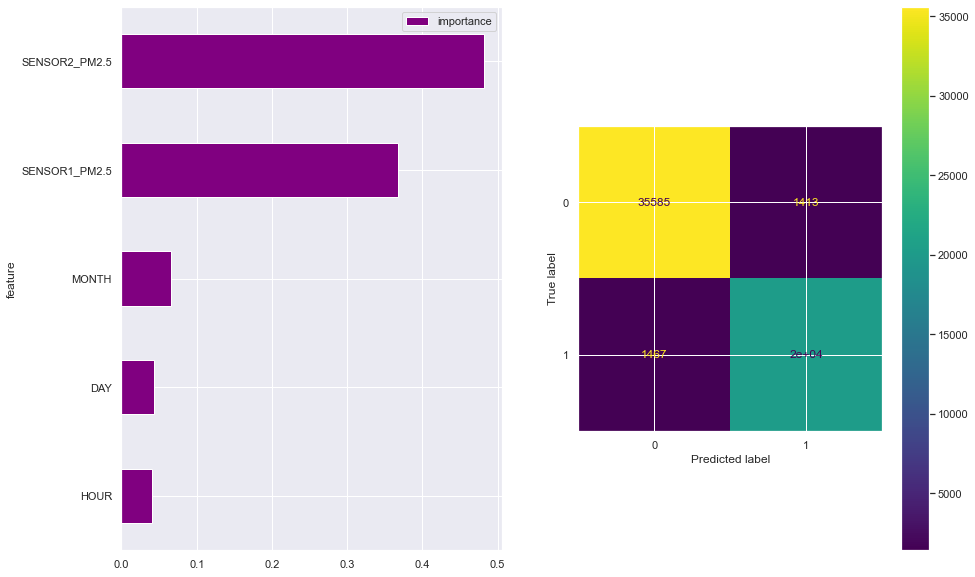

In [211]:
#Create columns as per the preparation function
train_df = prepare_df(raw_train_df)

#Scale the data
# train_df = scale_df(train_df)
# print(train_df.columns)

#Bin the continuous features
# train_df = bin_df(train_df)

#Drop columns with Null values in Sensor Data
train_df = train_df[(train_df['SENSOR1_PM2.5'].notna()) & (train_df['SENSOR1_PM2.5'].notna())]

train_df['OFFSET_FAULT'] = raw_train_df['Offset_fault']

#Fill the Nan values in temp & humidity with mean values
# train_df = fill_na_mean(train_df)

#Fill the Nan values in Sensor values with zeroes
# train_df = fill_na_mean(train_df)

#At this point, we can select specific columns to be used in the fitting.
#We can experiment by using the SENSOR1_PM2.5, SENSOR2_PM2.5, TEMPERATURE & HOUR columns
# NOTE that the OFFSET_FAULT column should always be included
# model_cols = ['OFFSET_FAULT','SENSOR1_PM2.5', 'SENSOR2_PM2.5']
#             'MONTH_10', 'YEAR', 'MONTH_12', 'DAY', 'OFFSET_FAULT']

#If we want to use all columns, uncomment the line below
model_cols = [col for col in train_df.columns if col not in \
    ['TEMPERATURE', 'RELATIVE_HUMIDITY', 'YEAR', 'DAY_OF_WEEK', 'HOUR_OF_WEEK']]

# The following columns are removed in the function itself: ID, DATETIME

#Fit the model. 
xgb, X_xgb = xgb_model(train_df[model_cols])

C:\Users\teddy\miniconda3\envs\DS_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


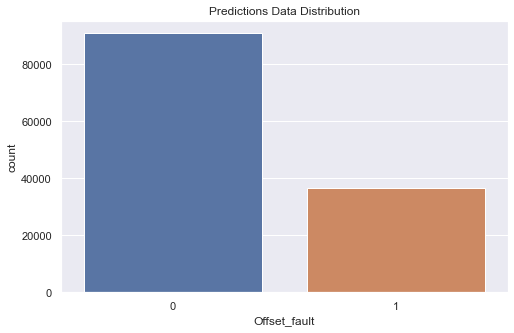

In [213]:
pred_test(xgb, X_xgb)

The above configuration yielded the highest accuracy score as per the submission: ~0.828. 
<br>
The features used: SENSOR1_PM2.5, SENSOR2_PM2.5, MONTH, DAY, HOUR 

### Naive Bayes Modelling

In [207]:
#Function to take df with valid columns to be used for model fitting.
# OUtput is the RandomForestClassifier
#Function can take additional paramters for the RandomForestClassifier Model.

def gnb_model(_df,
                learning_rate= 0.1,
                max_depth = 10,
                min_child_weight = 1,
                n_estimators=100,
                objective= 'binary:logistic',
                random_state=0,
                eval_metric = 'logloss'):

    df = _df.copy(deep=True)

    # Splitting the dataset into X & y
    X = df[[col for col in df.columns if col not in\
        ['OFFSET_FAULT', 'ID', 'DATETIME']
        ]]
    y = df['OFFSET_FAULT']

    #Splitting the data into training & testing sets.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                            random_state= 42)

    # Instantiate the RandomForestClassifier & fit the train data
    # gnb = gnbClassifier(learning_rate= learning_rate,
    #                     max_depth = max_depth,
    #                     n_estimators = n_estimators,
    #                     min_child_weight = min_child_weight,
    #                     objective = objective,
    #                     eval_metric = eval_metric,
    #                     random_state= random_state)
    gnb = GaussianNB()
    #Fit the train data
    gnb.fit(X_train, y_train)

    #Test the model
    y_pred = gnb.predict(X_test)

    #Calculate the model's accuracy
    print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
    print('\n')
    print(f'{classification_report(y_test, y_pred)}')

    #Plot the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)

    fig, axs = plt.subplots(1,2, figsize = (15,10))

    disp.plot(ax=axs[1])

    # Plot Feature Importance Bar Chart
    impo_df = pd.DataFrame({'feature': X.columns, 'importance': gnb.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
    impo_df = impo_df.sort_values(by = 'importance', ascending = True)
    impo_df.plot(kind = 'barh', color = 'purple', ax = axs[0])

    # plt.show()

    return gnb, X

In [208]:
#Create columns as per the preparation function
train_df = prepare_df(raw_train_df)

#Fill the Nan values  in temp & humidity using mean values
# train_df = fill_na_mean(train_df)
#Fill with na all out
train_df = fill_na_na(train_df)

#Bin the continuous features
# train_df = bin_df(train_df)

#At this point, we can select specific columns to be used in the fitting.
#We can experiment by using the SENSOR1_PM2.5, SENSOR2_PM2.5, TEMPERATURE & HOUR columns
# NOTE that the OFFSET_FAULT column should always be included
# model_cols = ['SENSOR1_PM2.5', 'SENSOR2_PM2.5', 'TEMPERATURE', 'OFFSET_FAULT']

#If we want to use all columns, uncomment the line below
model_cols = [col for col in train_df.columns]

# The following columns are removed in the function itself: ID, DATETIME

#Fit the model
gnb, X_gnb = gnb_model(train_df[model_cols])

TypeError: _validate_data() missing 1 required positional argument: 'X'

The above model(Naive Bayes) failed to initialize.

## Hyper Parameter Tuning

We can choose to either run the functions multiple times with different variables for the model's hyperparameters, or utilize the GridSearch function

#### Iterating the above functions

In [125]:
%%capture cap --no-stderr
def iter_params():    
    #The above magic command will enable saving the output of the cell
    #For tuning the RandomForestClassifier parameters:

    #Code for filtering the dataset's features can be included here.


    #Declare the list of hyper parameters to loop through.
    # NOTE that the duration of running the functions will be EXPONENTIAL to the number of points in the parameters
    #ie. 3 parameters with three points will  have a Big O Notation of (3 ** 3)
    n_estimators = [50,100,200]
    max_depths = [4,10]
    random_states = [0, 42, 123]
    


    #Create iterative loops to be looped through.
    for n_estimator in n_estimators:
        for max_depth in max_depths:
            for random_state in random_states:
                print('Max_depth: \t {} \n N_estimators: \t {} \n Random_state: \t {} \n'\
                    .format(max_depth, n_estimator, random_state))
                xgb, X_xgb = xgb_model(train_df, max_depth=max_depth,
                                            n_estimators=n_estimator,
                                            random_state=random_state)

    #Save the output to a file
    #May be required to be run twixe if the error 'cap does not exist' is observed.
    with open('Challenge/data/rfc_tuning.txt', "w") as f:
        f.write(cap.stdout)

Max_depth: 	 15 
 N_estimators: 	 50 
 Random_state: 	 0 



C:\Users\teddy\miniconda3\envs\DS_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:55:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score: 0.9573827310047782


              precision    recall  f1-score   support

           0       0.96      0.97      0.97     37442
           1       0.94      0.94      0.94     21994

    accuracy                           0.96     59436
   macro avg       0.95      0.95      0.95     59436
weighted avg       0.96      0.96      0.96     59436

Max_depth: 	 15 
 N_estimators: 	 50 
 Random_state: 	 42 



C:\Users\teddy\miniconda3\envs\DS_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:55:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score: 0.9573827310047782


              precision    recall  f1-score   support

           0       0.96      0.97      0.97     37442
           1       0.94      0.94      0.94     21994

    accuracy                           0.96     59436
   macro avg       0.95      0.95      0.95     59436
weighted avg       0.96      0.96      0.96     59436

Max_depth: 	 15 
 N_estimators: 	 50 
 Random_state: 	 123 



C:\Users\teddy\miniconda3\envs\DS_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:56:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score: 0.9573827310047782


              precision    recall  f1-score   support

           0       0.96      0.97      0.97     37442
           1       0.94      0.94      0.94     21994

    accuracy                           0.96     59436
   macro avg       0.95      0.95      0.95     59436
weighted avg       0.96      0.96      0.96     59436

Max_depth: 	 20 
 N_estimators: 	 50 
 Random_state: 	 0 



C:\Users\teddy\miniconda3\envs\DS_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:56:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score: 0.9573827310047782


              precision    recall  f1-score   support

           0       0.96      0.97      0.97     37442
           1       0.94      0.94      0.94     21994

    accuracy                           0.96     59436
   macro avg       0.95      0.95      0.95     59436
weighted avg       0.96      0.96      0.96     59436

Max_depth: 	 20 
 N_estimators: 	 50 
 Random_state: 	 42 



C:\Users\teddy\miniconda3\envs\DS_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:57:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score: 0.9573827310047782


              precision    recall  f1-score   support

           0       0.96      0.97      0.97     37442
           1       0.94      0.94      0.94     21994

    accuracy                           0.96     59436
   macro avg       0.95      0.95      0.95     59436
weighted avg       0.96      0.96      0.96     59436

Max_depth: 	 20 
 N_estimators: 	 50 
 Random_state: 	 123 



C:\Users\teddy\miniconda3\envs\DS_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:58:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score: 0.9573827310047782


              precision    recall  f1-score   support

           0       0.96      0.97      0.97     37442
           1       0.94      0.94      0.94     21994

    accuracy                           0.96     59436
   macro avg       0.95      0.95      0.95     59436
weighted avg       0.96      0.96      0.96     59436

Max_depth: 	 50 
 N_estimators: 	 50 
 Random_state: 	 0 



C:\Users\teddy\miniconda3\envs\DS_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:59:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score: 0.9573827310047782


              precision    recall  f1-score   support

           0       0.96      0.97      0.97     37442
           1       0.94      0.94      0.94     21994

    accuracy                           0.96     59436
   macro avg       0.95      0.95      0.95     59436
weighted avg       0.96      0.96      0.96     59436

Max_depth: 	 50 
 N_estimators: 	 50 
 Random_state: 	 42 



C:\Users\teddy\miniconda3\envs\DS_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:00:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score: 0.9573827310047782


              precision    recall  f1-score   support

           0       0.96      0.97      0.97     37442
           1       0.94      0.94      0.94     21994

    accuracy                           0.96     59436
   macro avg       0.95      0.95      0.95     59436
weighted avg       0.96      0.96      0.96     59436

Max_depth: 	 50 
 N_estimators: 	 50 
 Random_state: 	 123 



C:\Users\teddy\miniconda3\envs\DS_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:00:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score: 0.9573827310047782


              precision    recall  f1-score   support

           0       0.96      0.97      0.97     37442
           1       0.94      0.94      0.94     21994

    accuracy                           0.96     59436
   macro avg       0.95      0.95      0.95     59436
weighted avg       0.96      0.96      0.96     59436

Max_depth: 	 15 
 N_estimators: 	 100 
 Random_state: 	 0 



C:\Users\teddy\miniconda3\envs\DS_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:01:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score: 0.9573827310047782


              precision    recall  f1-score   support

           0       0.96      0.97      0.97     37442
           1       0.94      0.94      0.94     21994

    accuracy                           0.96     59436
   macro avg       0.95      0.95      0.95     59436
weighted avg       0.96      0.96      0.96     59436

Max_depth: 	 15 
 N_estimators: 	 100 
 Random_state: 	 42 



C:\Users\teddy\miniconda3\envs\DS_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:02:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score: 0.9573827310047782


              precision    recall  f1-score   support

           0       0.96      0.97      0.97     37442
           1       0.94      0.94      0.94     21994

    accuracy                           0.96     59436
   macro avg       0.95      0.95      0.95     59436
weighted avg       0.96      0.96      0.96     59436

Max_depth: 	 15 
 N_estimators: 	 100 
 Random_state: 	 123 



C:\Users\teddy\miniconda3\envs\DS_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:03:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score: 0.9573827310047782


              precision    recall  f1-score   support

           0       0.96      0.97      0.97     37442
           1       0.94      0.94      0.94     21994

    accuracy                           0.96     59436
   macro avg       0.95      0.95      0.95     59436
weighted avg       0.96      0.96      0.96     59436

Max_depth: 	 20 
 N_estimators: 	 100 
 Random_state: 	 0 



C:\Users\teddy\miniconda3\envs\DS_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score: 0.9573827310047782


              precision    recall  f1-score   support

           0       0.96      0.97      0.97     37442
           1       0.94      0.94      0.94     21994

    accuracy                           0.96     59436
   macro avg       0.95      0.95      0.95     59436
weighted avg       0.96      0.96      0.96     59436

Max_depth: 	 20 
 N_estimators: 	 100 
 Random_state: 	 42 



C:\Users\teddy\miniconda3\envs\DS_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:05:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score: 0.9573827310047782


              precision    recall  f1-score   support

           0       0.96      0.97      0.97     37442
           1       0.94      0.94      0.94     21994

    accuracy                           0.96     59436
   macro avg       0.95      0.95      0.95     59436
weighted avg       0.96      0.96      0.96     59436

Max_depth: 	 20 
 N_estimators: 	 100 
 Random_state: 	 123 



C:\Users\teddy\miniconda3\envs\DS_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:06:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score: 0.9573827310047782


              precision    recall  f1-score   support

           0       0.96      0.97      0.97     37442
           1       0.94      0.94      0.94     21994

    accuracy                           0.96     59436
   macro avg       0.95      0.95      0.95     59436
weighted avg       0.96      0.96      0.96     59436

Max_depth: 	 50 
 N_estimators: 	 100 
 Random_state: 	 0 



C:\Users\teddy\miniconda3\envs\DS_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:06:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score: 0.9573827310047782


              precision    recall  f1-score   support

           0       0.96      0.97      0.97     37442
           1       0.94      0.94      0.94     21994

    accuracy                           0.96     59436
   macro avg       0.95      0.95      0.95     59436
weighted avg       0.96      0.96      0.96     59436

Max_depth: 	 50 
 N_estimators: 	 100 
 Random_state: 	 42 



C:\Users\teddy\miniconda3\envs\DS_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:07:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KeyboardInterrupt: 

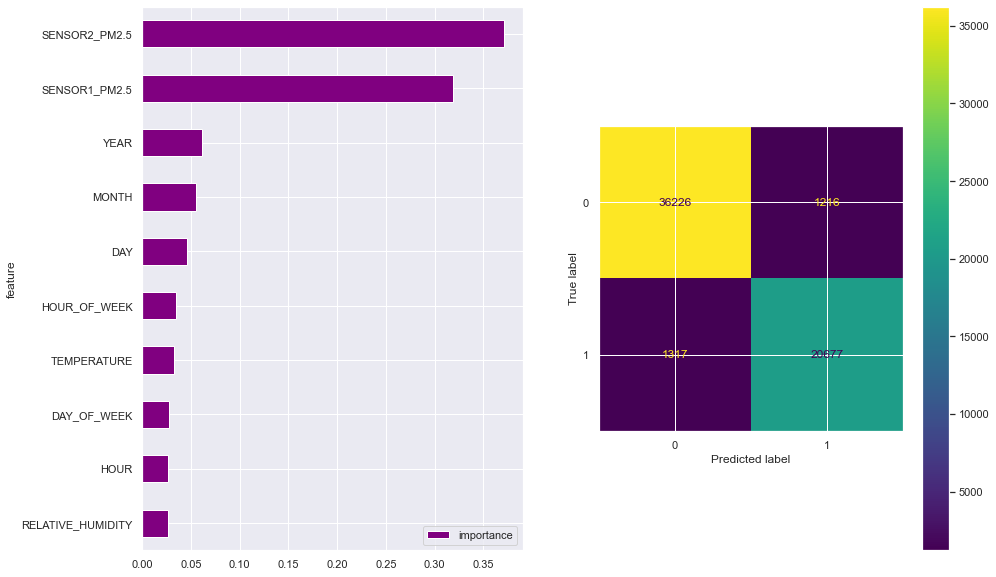

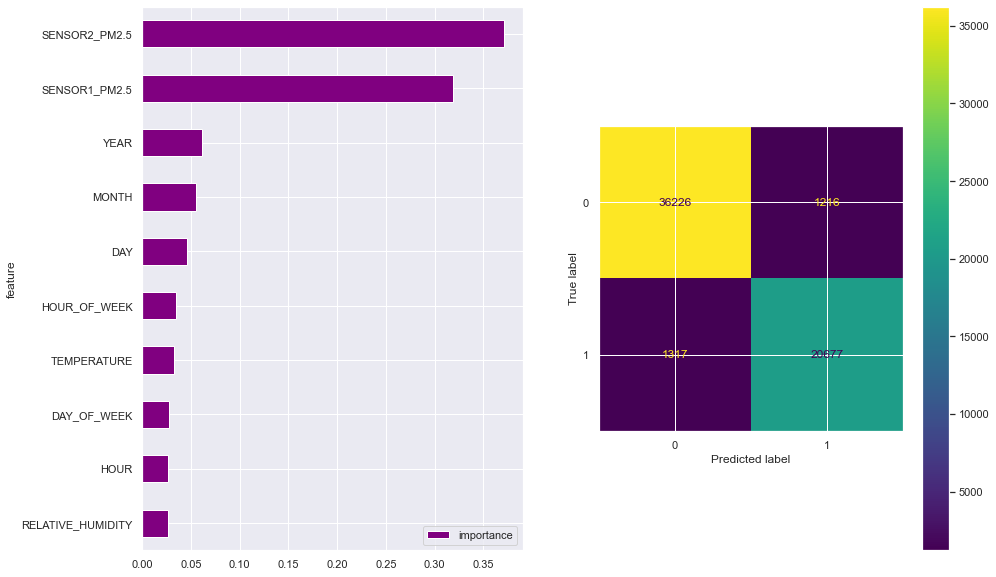

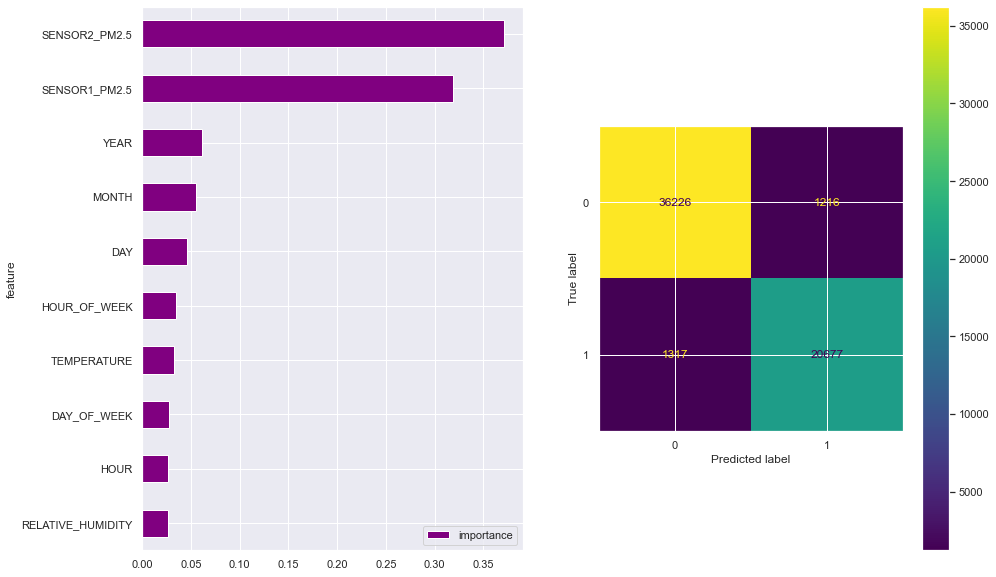

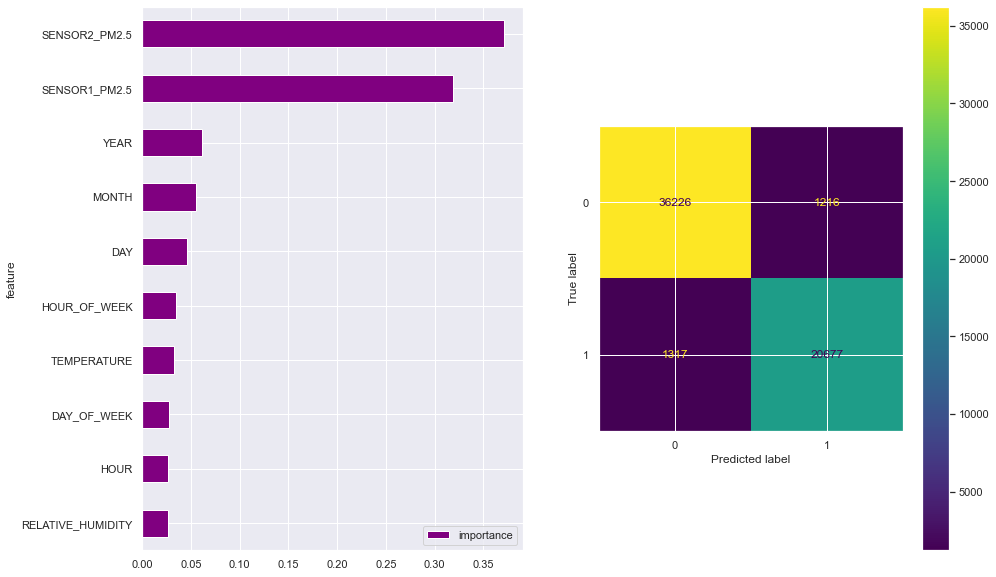

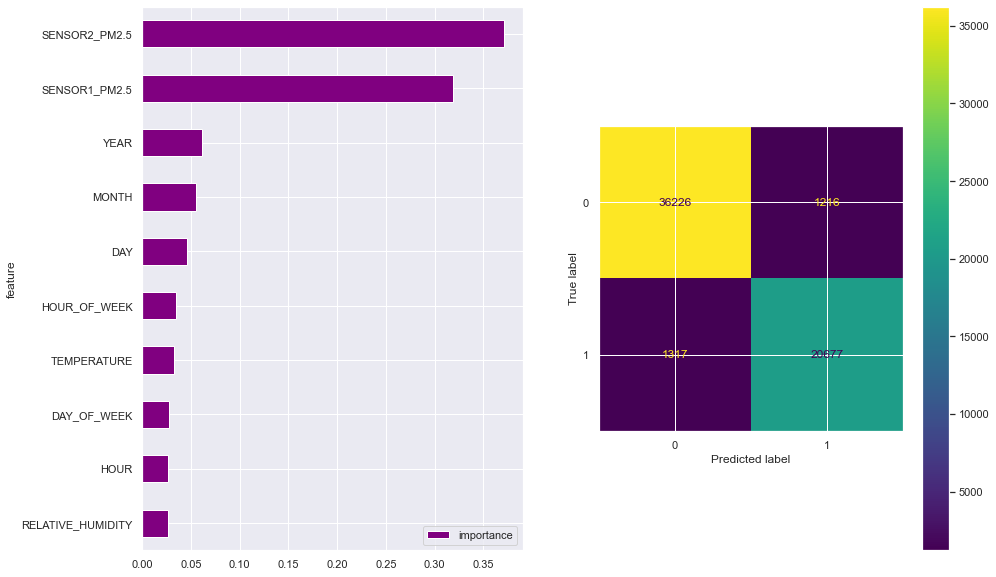

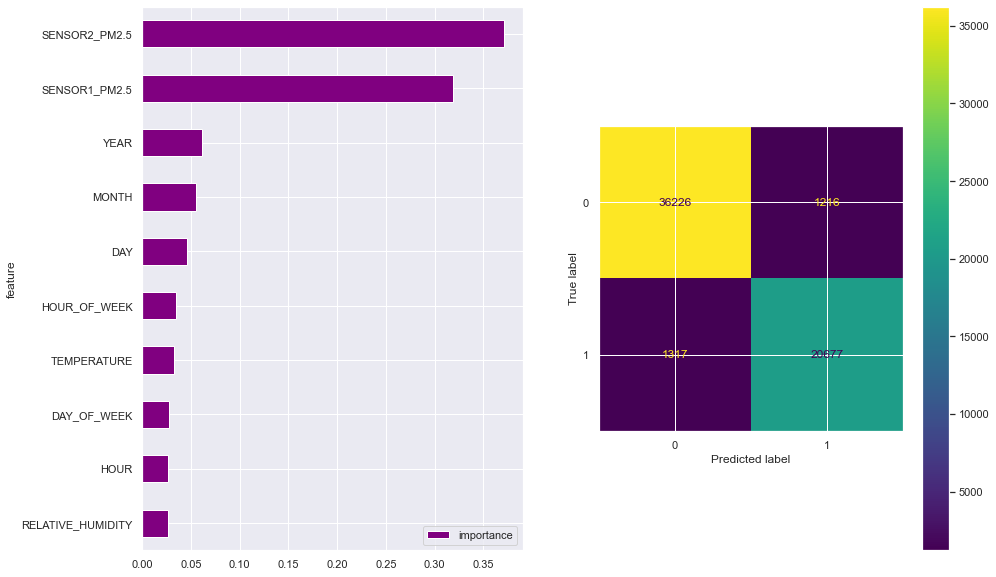

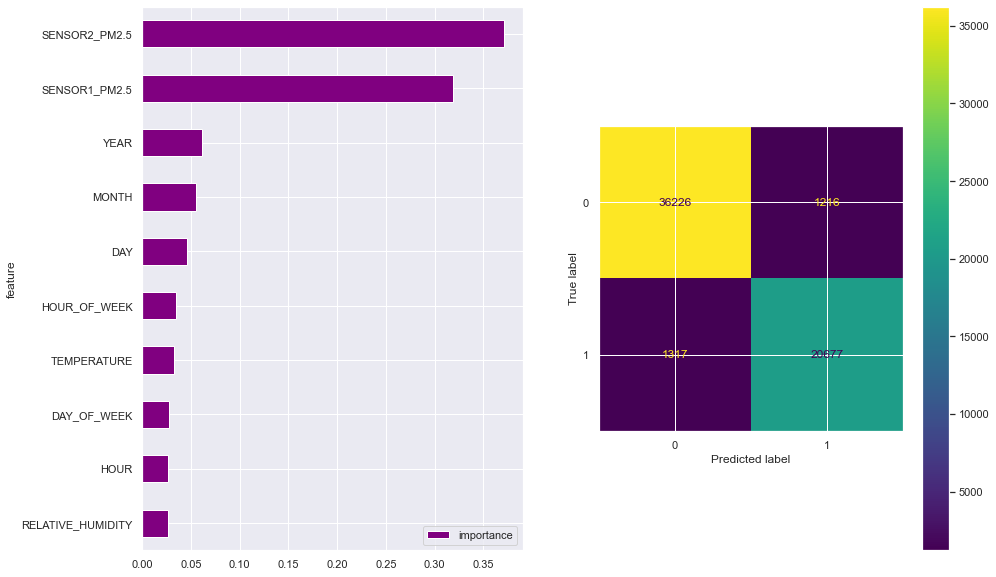

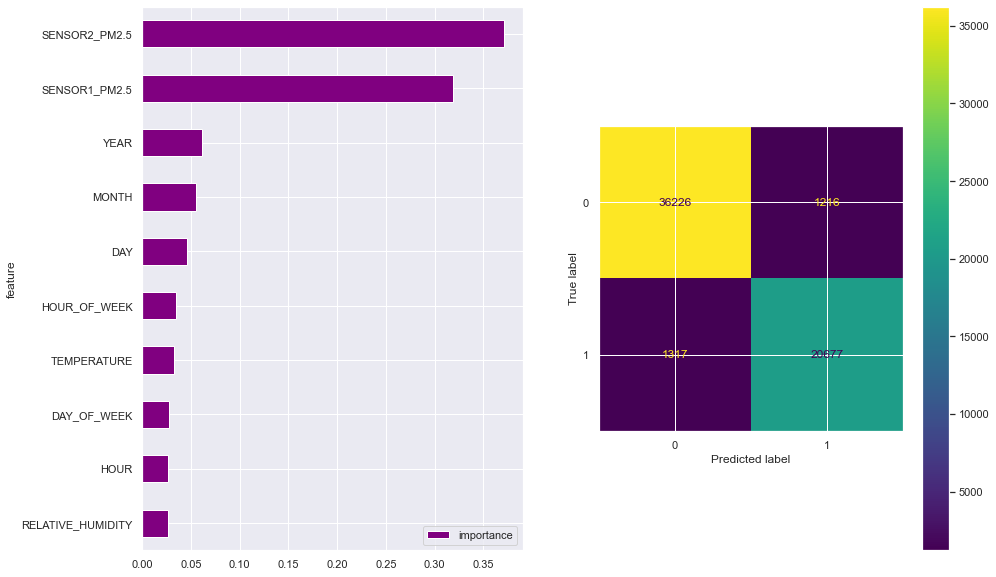

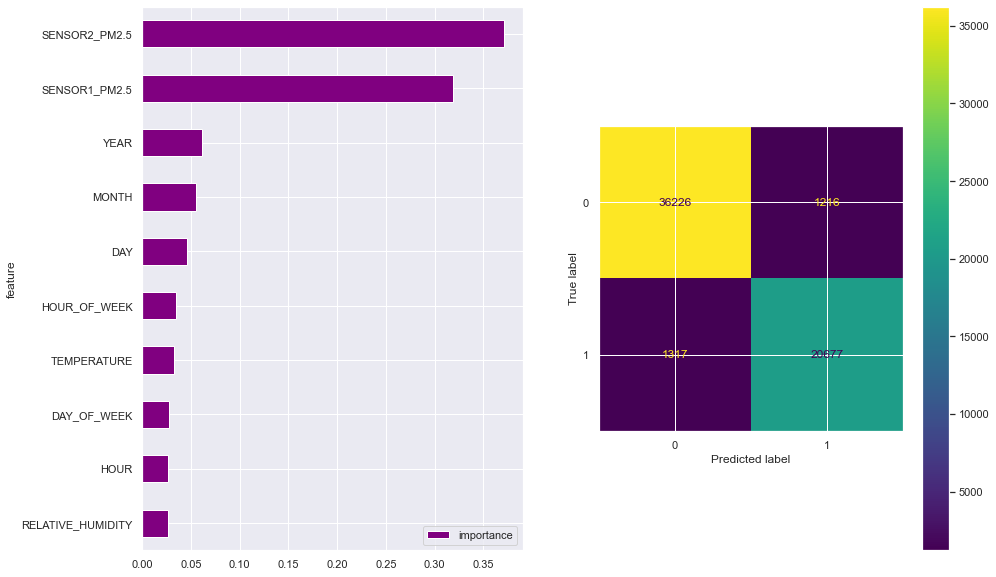

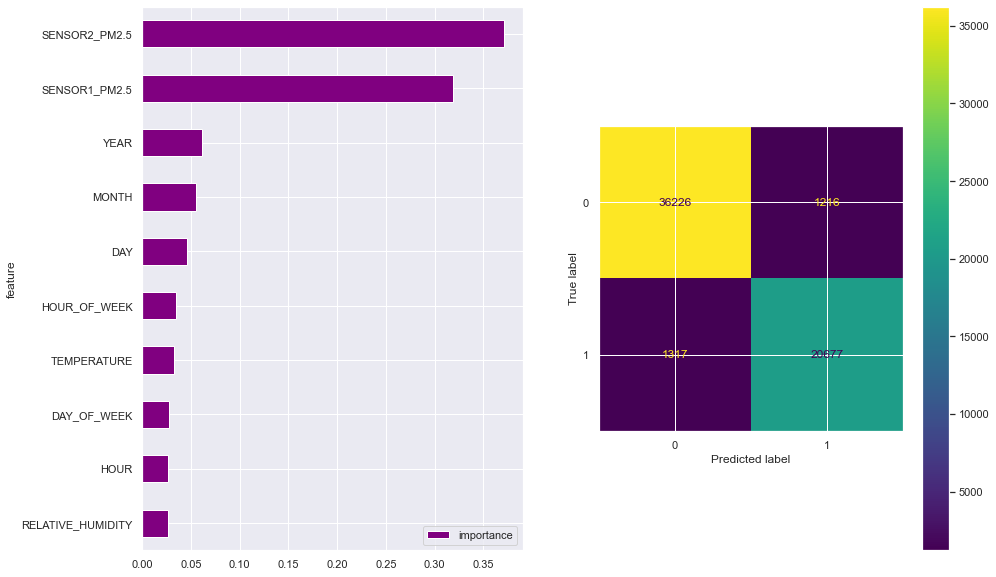

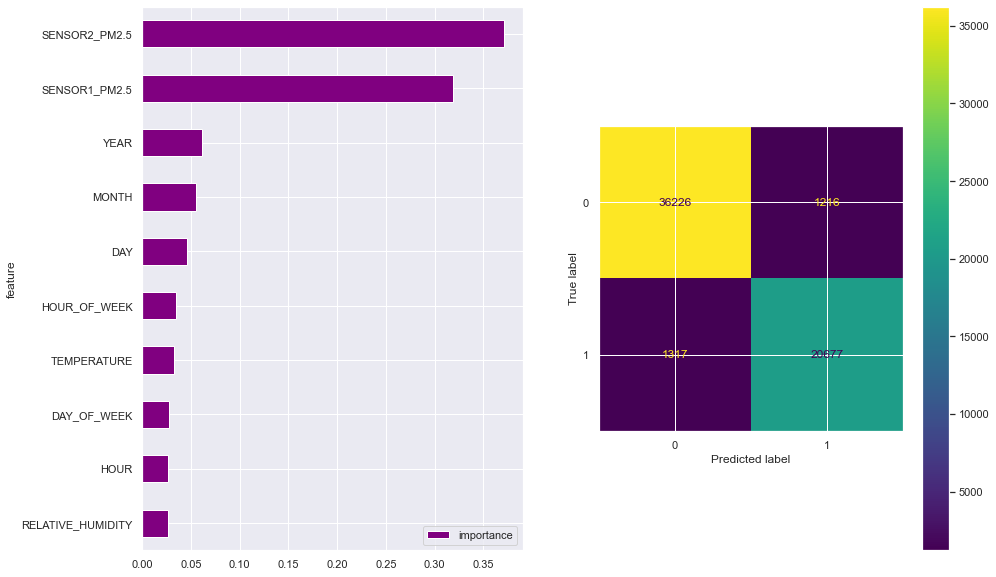

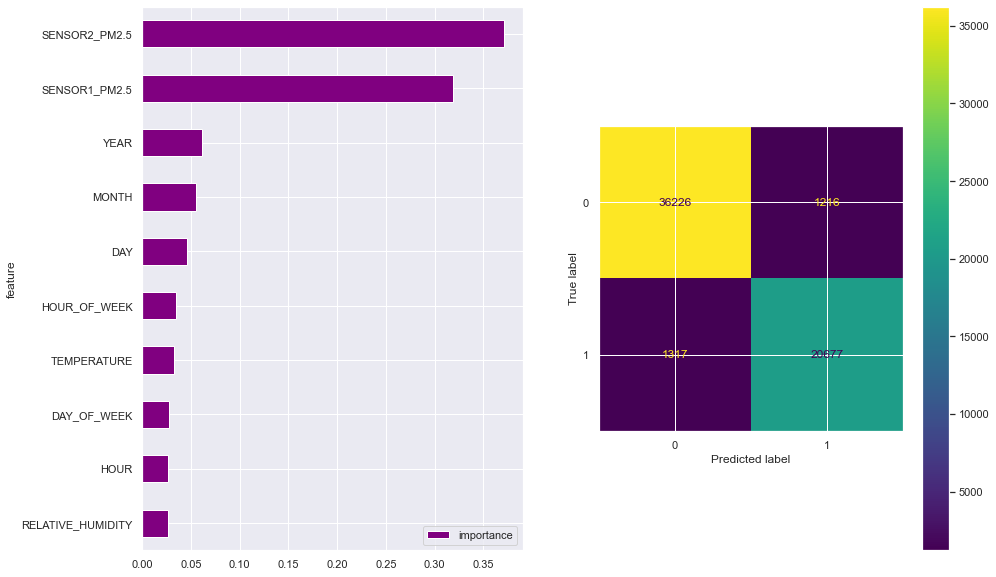

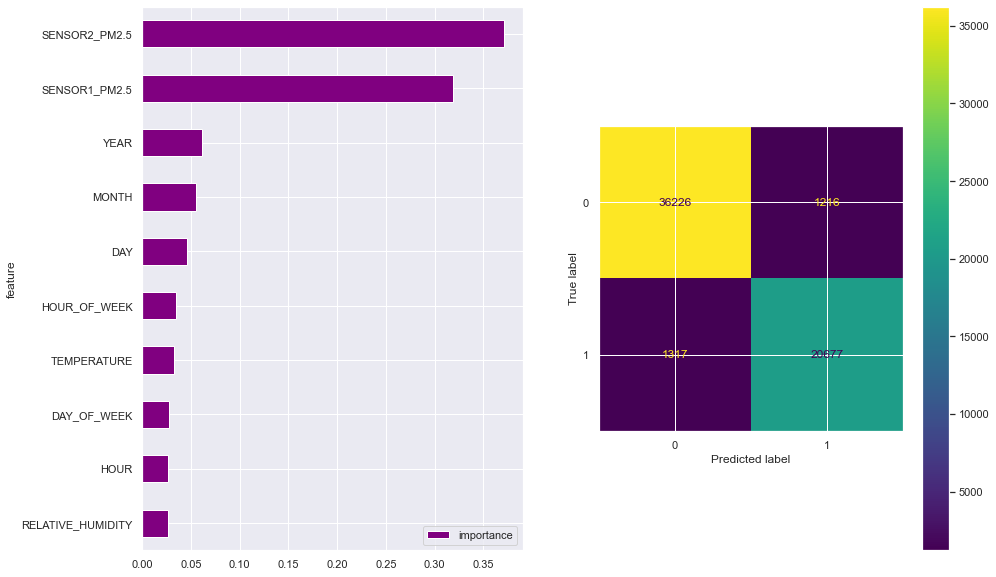

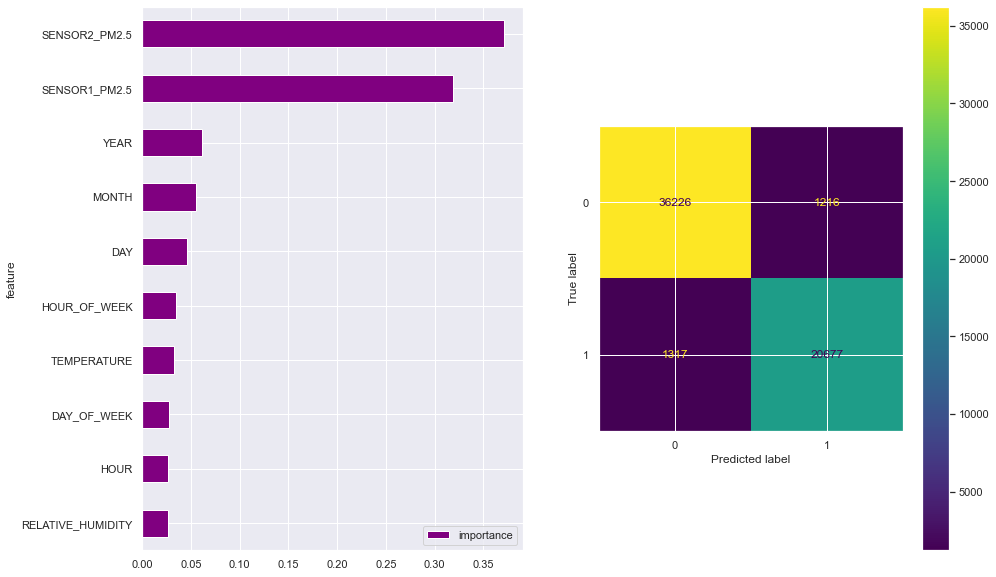

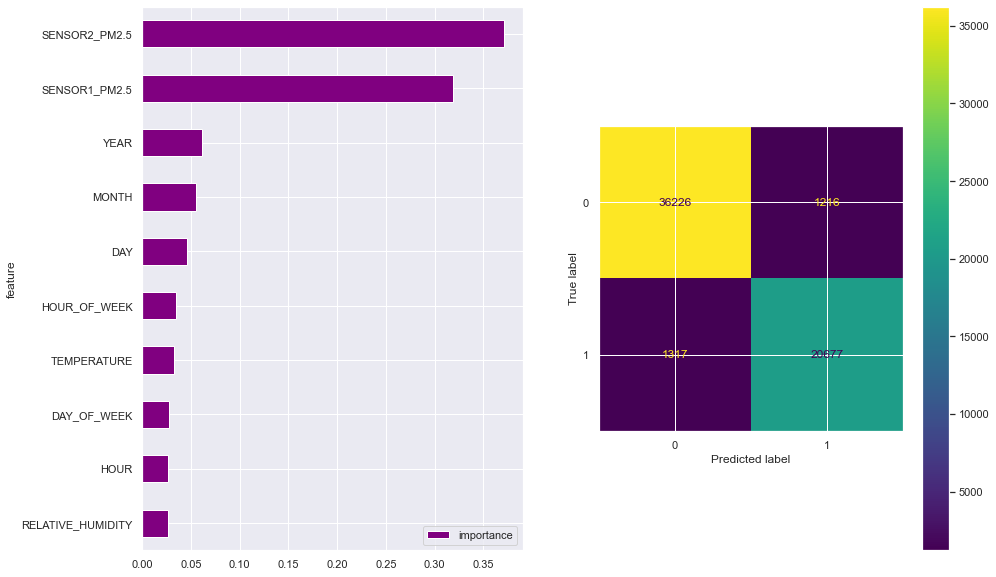

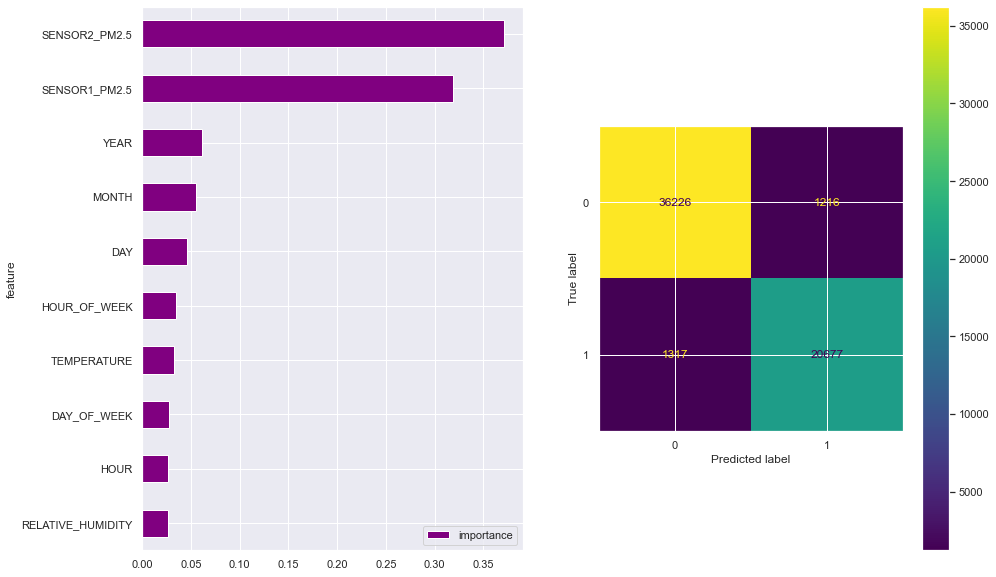

In [126]:
#If run the current output will be for the XGBoost model.
# NOTE may take a long while to complete.
iter_params()

### GridSearch Functionality

_This was not implemented_

## Prepare Submission Output

The function below was intended to carry out the prediction for the test DF. <br>
The method takes the model object & the X-variable feature DF.<br>
Some functions may be required to be included in order to have the test data matching the training dataset format. ie. binning data, scaling, et al.

In [21]:
def pred_test(model, X):
    test_df = prepare_df(raw_test_df)

    # test_df = scale_df(test_df)

    # test_df = bin_df(test_df)
    # test_df = fill_na_na(test_df)



    test_pred = model.predict(test_df[X.columns])
    model_sub_file = raw_samp_df.copy(deep = True)
    model_sub_file['Offset_fault'] = test_pred

    model_sub_file.to_csv('model_sub.csv', index = False)
    
    # Check the distribution of your predictions
    plt.figure(figsize=(8, 5))
    sns.countplot(model_sub_file.Offset_fault)
    plt.title('Predictions Data Distribution')

C:\Users\teddy\miniconda3\envs\DS_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


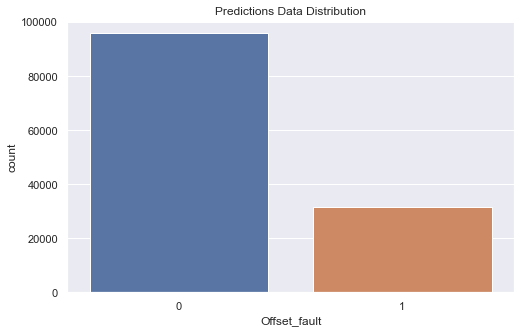

In [194]:
pred_test(xgb, X_xgb)

## Conclusion

- Disregarding the missing values in the training & testing datasets offered the best configuration during modelling, as per the explanations provided under dealing with Null values.
- XGBoost Classification offered the best output in each circumstance of modelling.
- Modelling & engineering may be improved later if better methodologies are discovered.